In [3]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf

def reset_seed():
    tf.random.set_seed(0)
    np.random.seed(0)

from sklearn import metrics

def classification_results(y, yhat):
    acc = metrics.accuracy_score(y, yhat)
    mcc = metrics.matthews_corrcoef(y, yhat)
    f1_weighted = metrics.f1_score(y, yhat, average="weighted")
    return acc, mcc, f1_weighted


reset_seed()

# TIP 1 - General Tip: Use the datetime in your favor

In [4]:
df = pd.read_csv("./datasets/df_raw_features.tar.gz")
df.head()

,pid,time,id,sort,sleep_phase,act_0,act_1,act_2,act_3,act_4,...,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10
0,0,29,"(0, 0)",0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0
1,0,59,"(0, 1)",1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,76.0
2,0,89,"(0, 2)",2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,76.0,78.0
3,0,119,"(0, 3)",3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,71.0,76.0,78.0,73.0
4,0,149,"(0, 4)",4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,71.0,76.0,78.0,73.0,80.0


Thanks to: <b> https://www.tensorflow.org/tutorials/structured_data/time_series </b>

In [5]:
nrows = 100

time = pd.date_range("2022-09-16", periods=nrows, freq="H")
numbers = np.random.random_integers(low=0, high=100, size=100)

df = pd.DataFrame({"Time": time, "Numbers": numbers})
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     100 non-null    datetime64[ns]
 1   Numbers  100 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


/var/folders/47/3qykw18x31n87lxnd4kh3rtm0000gn/T/ipykernel_83526/1330924337.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  numbers = np.random.random_integers(low=0, high=100, size=100)


,Time,Numbers
0,2022-09-16 00:00:00,44
1,2022-09-16 01:00:00,47
2,2022-09-16 02:00:00,64
3,2022-09-16 03:00:00,67
4,2022-09-16 04:00:00,67
...,...,...
95,2022-09-19 23:00:00,58
96,2022-09-20 00:00:00,23
97,2022-09-20 01:00:00,79
98,2022-09-20 02:00:00,13


In [6]:
day = 24*60*60
timestamp_s = time.map(pd.Timestamp.timestamp)

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))


In [7]:
df

,Time,Numbers,Day sin,Day cos
0,2022-09-16 00:00:00,44,-5.574892e-12,1.000000
1,2022-09-16 01:00:00,47,2.588190e-01,0.965926
2,2022-09-16 02:00:00,64,5.000000e-01,0.866025
3,2022-09-16 03:00:00,67,7.071068e-01,0.707107
4,2022-09-16 04:00:00,67,8.660254e-01,0.500000
...,...,...,...,...
95,2022-09-19 23:00:00,58,-2.588190e-01,0.965926
96,2022-09-20 00:00:00,23,-2.932653e-12,1.000000
97,2022-09-20 01:00:00,79,2.588190e-01,0.965926
98,2022-09-20 02:00:00,13,5.000000e-01,0.866025


<AxesSubplot:>

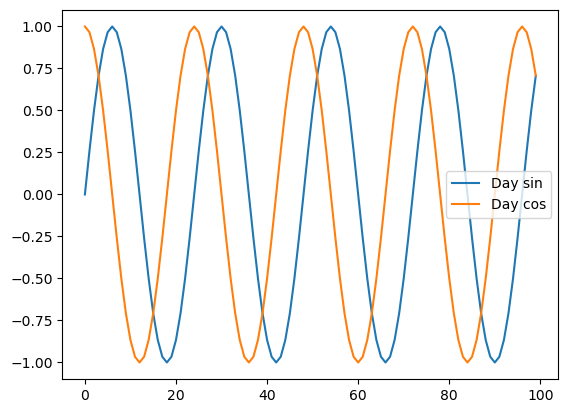

In [8]:
df[["Day sin", "Day cos"]].plot()

# TIP 2 - Network tunning

#### Tune your Network
- Optmizer (https://keras.io/api/optimizers/)
- Learning Rate (keras.optimizers.Adam(learning_rate=0.01))
- Grid Search
- Advanced Models

In [ ]:
# To be used with NB 7
def bilstm_model(cnn_d=32, lstm_d=16):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Masking(mask_value=MASKING_VALUE))
        
    model.add(tf.keras.layers.Dropout(0.01))

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_d, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_d, return_sequences=True)))
    
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(16, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid", name='output'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

bilstm_model = bilstm_model()

# More Advanced networks

In [ ]:
# To be used with NB 7
def bilstm_model(cnn_d=32, lstm_d=16):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Masking(mask_value=MASKING_VALUE))
        
    model.add(tf.keras.layers.Dropout(0.01))

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_d, return_sequences=True)))

    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(16, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid", name='output'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

bilstm_model = bilstm_model()

In [3]:

# To be used with NB 5 and 6
def my_little_resnet_model(input_shape, blocks=3, cnn_d=32, stride=2):
    
    def residual_block(X, cnn_d, stride):
        
        out = keras.layers.Conv1D(cnn_d, stride, padding='same')(X)
        out = keras.layers.ReLU()(out)
        out = keras.layers.Conv1D(cnn_d, stride, padding='same')(out)
        out = keras.layers.add([X, out])    # Adds the previous layer residual to the current output
        out = keras.layers.ReLU()(out)
        out = keras.layers.MaxPool1D(strides=2, padding="same")(out)
        return out
    
    inputs = keras.layers.Input(input_shape)
    X = keras.layers.Conv1D(cnn_d, stride)(inputs)
    for _ in range(blocks):
        X = residual_block(X, cnn_d, stride)
    
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(32, activation='relu')(X)
    X = keras.layers.Dense(8, activation='relu')(X)
    output = keras.layers.Dense(1, activation='sigmoid')(X)

    model = keras.Model(inputs=inputs, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
    

In [ ]:
# From: https://github.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline/blob/master/ResNet.py
# To be used with NB 5 and 6
def build_resnet(input_shape, n_feature_maps):
    
    print ('build conv_x')
    x = keras.layers.Input(shape=(input_shape))
    conv_x = keras.layers.BatchNormalization()(x)
    conv_x = keras.layers.Conv1D(n_feature_maps, 8, 1, padding='same')(conv_x)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv1D(n_feature_maps, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv1D(n_feature_maps, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv1D(n_feature_maps, 1, 1,padding='same')(x)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv1D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv1D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv1D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv1D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv1D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv1D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv1D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)

    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv1D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    full = keras.layers.GlobalAveragePooling1D()(y)
    out = keras.layers.Dense(1, activation='sigmoid')(full)
    print ('        -- model was built.')
    
    model = keras.Model(inputs=x, outputs=out)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
 

In [ ]:
# WaveNet: https://www.deepmind.com/blog/wavenet-a-generative-model-for-raw-audio

def WaveNetResidualConv1D(num_filters, kernel_size, stacked_layer):

    def build_residual_block(l_input):
        resid_input = l_input
        for dilation_rate in [2**i for i in range(stacked_layer)]:
            l_sigmoid_conv1d = Conv1D(
              num_filters, kernel_size, dilation_rate=dilation_rate,
              padding='same', activation='sigmoid')(l_input)
            l_tanh_conv1d = Conv1D(
             num_filters, kernel_size, dilation_rate=dilation_rate,
             padding='same', activation='mish')(l_input)
            l_input = Multiply()([l_sigmoid_conv1d, l_tanh_conv1d])
            l_input = Conv1D(num_filters, 1, padding='same')(l_input)
            resid_input = Add()([resid_input ,l_input])
        return resid_input
    return build_residual_block

def Classifier(shape_):
    num_filters_ = 16
    kernel_size_ = 3
    stacked_layers_ = [12, 8, 4, 1]
    l_input = Input(shape=(shape_))
    x = Conv1D(num_filters_, 1, padding='same')(l_input)
    x = WaveNetResidualConv1D(num_filters_, kernel_size_, stacked_layers_[0])(x)
    x = Conv1D(num_filters_*2, 1, padding='same')(x)
    x = WaveNetResidualConv1D(num_filters_*2, kernel_size_, stacked_layers_[1])(x)
    x = Conv1D(num_filters_*4, 1, padding='same')(x)
    x = WaveNetResidualConv1D(num_filters_*4, kernel_size_, stacked_layers_[2])(x)
    x = Conv1D(num_filters_*8, 1, padding='same')(x)
    x = WaveNetResidualConv1D(num_filters_*8, kernel_size_, stacked_layers_[3])(x)
    l_output = Dense(11, activation='softmax')(x)
    model = models.Model(inputs=[l_input], outputs=[l_output])
    opt = Adam(lr=LR)
    opt = tfa.optimizers.SWA(opt)
    model.compile(loss=losses.CategoricalCrossentropy(), optimizer=opt, metrics=['accuracy'])
    return model

# Approaches based on spectograms (NB 7)


Image from [dolby.io](https://dolby.io/blog/beginners-guide-to-visualizing-audio-as-a-spectogram-in-python/):

<img src="images/python-spectogram-annotated.png" width="2000" height="200">



In [2]:
Xcut = X_train[1][:400, 0]

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(Xcut, Fs=1/30.)
plt.show()

NameError: name 'X_train' is not defined

# Viz of ML results

In case you are curious to know how good your model ended up being

In [ ]:
# For NB 5 and 6
import matplotlib.pyplot as plt

def plot_eval_one_pid(df, test_range, nnmodel, x_test, pid, act_col="act_10", hr_col="hr_10"):
    
        
    df_held_out_test = df[df["pid"].isin(test_range)][["pid", "time", "sleep_phase", "sleep",  act_col, hr_col]].copy()
    df_held_out_test["yhat"] = nnmodel.predict(x_test).round()

    # Plot image for this one pid
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
    
    df1 = df_held_out_test[df_held_out_test["pid"] == pid].copy()
    
    df1["sleep"] = df1["sleep"].astype(int)
    df1[["time", act_col]].plot(x="time", y=act_col, ax=ax1, color="green")
    df1[["time", hr_col]].plot(x="time", y=hr_col, ax=ax2, color="red")
    df1[["time", "sleep"]].plot(x="time", y="sleep",  ax=ax3, color="blue")
    df1[["time", "yhat"]].plot(x="time", y="yhat",  ax=ax4, color="purple")
    
    ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax4.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()    


plot_eval_one_pid(df, range(50, 100), cnnlstm_model, X_test, pid=51, act_col="act", hr_col="hr")

In [ ]:
# For NB 7
import matplotlib.pyplot as plt

def plot_eval_one_pid(df, test_range, maxdim, nnmodel, x_test, y_test, masking_value, pid):
    
    df_held_out_test = df[df["pid"].isin(test_range)][["pid", "time", "sleep_phase", "sleep", "act_10", "hr_10"]].copy()
    df_held_out_test = df_held_out_test.groupby("pid").head(maxdim).reset_index(drop=True)
    
    p = nnmodel.predict(x_test).round()
    df_held_out_test["yhat"] = p[y_test != masking_value].round()
    
    # Plot image for this one pid
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
    
    df1 = df_held_out_test[df_held_out_test["pid"] == pid].copy()
    
    df1["sleep"] = df1["sleep"].astype(int)
    df1[["time", "act_10"]].plot(x="time", y="act_10", ax=ax1, color="green")
    df1[["time", "hr_10"]].plot(x="time", y="hr_10", ax=ax2, color="red")
    df1[["time", "sleep"]].plot(x="time", y="sleep",  ax=ax3, color="blue")
    df1[["time", "yhat"]].plot(x="time", y="yhat",  ax=ax4, color="purple")
    
    ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax4.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()


plot_eval_one_pid(df, range(50, 100), MAX_DIMENSION, bilstm_model,
             X_test.astype(float), Y_test, MASKING_VALUE, pid=51)